## Information Theory

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# entropy - uncertainty
# max when each outcomes are equally likely
# gets smaller when outcomes are biased

# how much can you learn by measuring... log2

# how many bits of uncertainty when there are 2 possible outcomes
np.log2(2)
# 8 possible outcomes
np.log2(8)

3.0

In [5]:
n = 16
np.log2(1/n) # same as log2(1) - log2(n)

-np.log2(1/n) # to bring it positive again

4.0

In [6]:
n = 16

H = 0
for i in np.arange(n):
    H += -((1/n) * np.log2(1/n))
print(H)

H = 0
for i in np.arange(n):
    H += -np.log2(1/n)
print(H/n)

# average entropy across all outcomes (so we need to normalize it by n) 
# this work for non-uniform distributions, when each outcome has different weights

4.0
4.0


3.8279550259738846


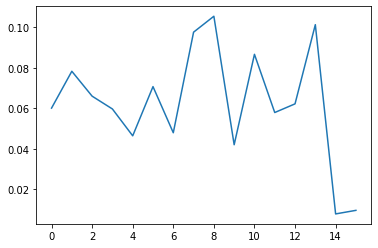

In [8]:
np.random.seed(0)

n=16
px = np.random.rand(n)
px /= np.sum(px)

# element-wise calculation w/o loop
H = -np.sum(px * np.log2(px))
plt.plot(px)
print(H)

## Mutual Information (MI)
* how much you learn about 1 variable from another
(not correlation)
* (total entropy of X) - (entropy of X given that we know Y)
* MI = H(X) - H(X|Y)

In [9]:
np.random.seed(0)
N = 1000
x = np.round(np.random.rand(N))
y = np.round(np.random.rand(N))
# a bunch of 0 and 1
print(x[0:10])

[1. 1. 1. 1. 0. 1. 0. 1. 1. 0.]


In [20]:
# introduce dependence (overlap/shared values)
p = .95 
ind = int(p*N)
y[:ind] = x[:ind] # make the first 850 values the same

In [21]:
# probability of each possible outcome of x (px) - each poss outcome
px = np.zeros(2)
px[0] = np.sum(x)/N # prob of getting 0
px[1] = 1-px[0] # prob of getting 1
print(px)
Hx = -np.sum(px*np.log2(px))
print(Hx)
# if .5 and .5 then Hx=1

[0.483 0.517]
0.9991659615315873


In [22]:
# possible values of y
Hxy = 0
for i in np.arange(2):
    py = np.sum(y==i)/N # tot poss of y==0 in the 1st loop, and y==1 in the 2nd loop
    tmp = 0
    for j in np.arange(2):        
        px_y = np.sum((x==j)&(y==i))/np.sum(y==i) # poss of x==0 given y==0 in the 1st loop
        tmp+= -(px_y * np.log2(px_y))
        
    Hxy += (py*tmp)
    
MI = Hx - Hxy
print(MI)

0.8149294036605923


## sklearn way

In [25]:
from sklearn.metrics import mutual_info_score
MI = mutual_info_score(x,y)
print(MI)
# this uses natural log instead of log2 that gives bits
print(MI* np.log2(np.e))

0.5648660185027373
0.8149294036605925


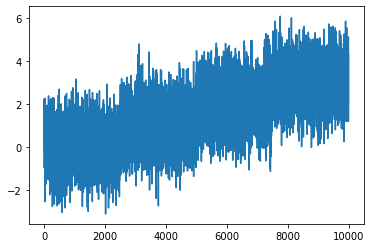

In [53]:
# 1 discrete and 1 continuous data set
np.random.seed(0)
N=10000
num_conds = 4
conds = np.repeat(np.arange(4),N/num_conds)

# continuous data
cond_means=[0,1,2,3]
cond_stds = [1,1,1,1]
resp = [] # response
for i in np.arange(num_conds):
    resp = np.hstack(( resp , ((np.random.randn(int(N/num_conds)) * cond_stds[i]) + cond_means[i]) ))
plt.plot(resp)
plt.show()

In [54]:
resp[:10]

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [55]:
# chop the continuous signals into 20 bins
nbins =20
b, edges = np.histogram(resp,bins = nbins)
print(b)
print(edges)


[  12   20   63  178  337  583  759  909 1059 1076 1141 1043  927  764
  535  322  164   73   30    5]
[-3.11685659 -2.65626479 -2.19567298 -1.73508118 -1.27448937 -0.81389757
 -0.35330576  0.10728604  0.56787785  1.02846965  1.48906146  1.94965327
  2.41024507  2.87083688  3.33142868  3.79202049  4.25261229  4.7132041
  5.1737959   5.63438771  6.09497951]


In [56]:
# assign each value to one of the bins
bin_y = np.digitize(resp,edges)

print(bin_y[:10]) # which bin
print(resp[:10]) # which original response value

[11  8  9 12 11  5  9  7  7  8]
[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


In [57]:
MI = mutual_info_score(conds,bin_y) * np.log2(np.e)
print(MI)

0.5775473445340966


### With increased separation

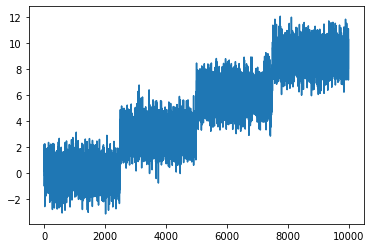

1.6256584061617003


In [52]:
np.random.seed(0)
N=10000
num_conds = 4
conds = np.repeat(np.arange(4),N/num_conds)

cond_means=[0,3,6,9]
cond_stds = [1,1,1,1]
resp = [] # response
for i in np.arange(num_conds):
    resp = np.hstack(( resp , ((np.random.randn(int(N/num_conds)) * cond_stds[i]) + cond_means[i]) ))
plt.plot(resp)
plt.show()
nbins =20
b, edges = np.histogram(resp,bins = nbins)
bin_y = np.digitize(resp,edges)
MI = mutual_info_score(conds,bin_y) * np.log2(np.e)
print(MI)

### Complete seperation MI  == np.log2(4)

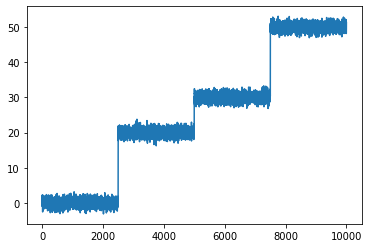

2.0000000000000013


In [60]:
np.random.seed(0)
N=10000
num_conds = 4
conds = np.repeat(np.arange(4),N/num_conds)

cond_means=[0,20,30,50]
cond_stds = [1,1,1,1]
resp = [] # response
for i in np.arange(num_conds):
    resp = np.hstack(( resp , ((np.random.randn(int(N/num_conds)) * cond_stds[i]) + cond_means[i]) ))
plt.plot(resp)
plt.show()
nbins =20
b, edges = np.histogram(resp,bins = nbins)
bin_y = np.digitize(resp,edges)
MI = mutual_info_score(conds,bin_y) * np.log2(np.e)
print(MI)

## Normalized MI

In [62]:
# normalized by the theoretical maximum
NMI = MI/np.log2(4)
print(NMI)

1.0000000000000007
